In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from matplotlib import gridspec
import matplotlib
import cartopy

In [2]:
coeffs = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/regress_coeffs/CMIP_coeffs_last250_20mod_3yr.nc')
coeffs.load()

<xarray.DataArray (model: 20, lat: 60, lon: 179, param1: 3, param2: 4)>
array([[[[[ 6.12853711e+03,  2.02542950e+18, -3.32717620e+09,
            2.10954991e+09],
          [-1.23223096e+01, -3.32717620e+09,  8.26398173e+00,
           -9.11394435e+00],
          [ 7.83643489e+01,  2.10954991e+09, -9.11394435e+00,
            1.87363866e+01]],

         [[ 6.45747321e+03,  3.53743828e+18, -4.68419339e+09,
            3.29670940e+09],
          [-1.27599116e+01, -4.68419339e+09,  9.35897588e+00,
           -1.07473271e+01],
          [ 7.87844615e+01,  3.29670940e+09, -1.07473271e+01,
            2.17349634e+01]],

         [[ 4.66251296e+03,  7.18573801e+17, -1.98167972e+09,
            1.08215198e+09],
          [-1.28364662e+01, -1.98167972e+09,  8.50477686e+00,
           -9.12738149e+00],
          [ 7.59753037e+01,  1.08215198e+09, -9.12738149e+00,
            1.97000991e+01]],
...
         [[-8.25981369e-01,  2.46649656e-03,  6.16487113e-02,
           -8.99918911e-02],
          [ 7.24786739e+00,  6.16487113e-02,  4.03070365e+00,
           -1.88701502e+00],
          [ 3.42560285e+01, -8.99918911e-02, -1.88701502e+00,
            6.96809510e+00]],

         [[            nan,             nan,             nan,
                       nan],
          [            nan,             nan,             nan,
                       nan],
          [            nan,             nan,             nan,
                       nan]],

         [[            nan,             nan,             nan,
                       nan],
          [            nan,             nan,             nan,
                       nan],
          [            nan,             nan,             nan,
                       nan]]]]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -59 -57 -55 -53 -51 -49 -47 ... 47 49 51 53 55 57 59
  * model    (model) object 'ACCESS-CM2' 'BCC-CSM2-MR' ... 'NorCPM1'
  * param2   (param2) object 'coeff' 'cov1' 'cov2' 'cov3'
  * param1   (param1) object 'r' 'lambda_a' 'lambda_o'

In [3]:
coeffs = coeffs.sel(model=['ACCESS-CM2', 'BCC-CSM2-MR', 'BCC-ESM1', 'CAMS-CSM1-0', 'CanESM5', 'CESM2', 'CESM2-WACCM', 
                          'CESM2-WACCM-FV2', 'CMCC-CM2-SR5', 'FGOALS-g3', 'GFDL-CM4', 'GFDL-ESM4', 'GISS-E2-1-G', 
                          'HadGEM3-GC31-MM', 'MIROC6', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NorCPM1'])
coeffs

<xarray.DataArray (model: 19, lat: 60, lon: 179, param1: 3, param2: 4)>
array([[[[[ 6.12853711e+03,  2.02542950e+18, -3.32717620e+09,
            2.10954991e+09],
          [-1.23223096e+01, -3.32717620e+09,  8.26398173e+00,
           -9.11394435e+00],
          [ 7.83643489e+01,  2.10954991e+09, -9.11394435e+00,
            1.87363866e+01]],

         [[ 6.45747321e+03,  3.53743828e+18, -4.68419339e+09,
            3.29670940e+09],
          [-1.27599116e+01, -4.68419339e+09,  9.35897588e+00,
           -1.07473271e+01],
          [ 7.87844615e+01,  3.29670940e+09, -1.07473271e+01,
            2.17349634e+01]],

         [[ 4.66251296e+03,  7.18573801e+17, -1.98167972e+09,
            1.08215198e+09],
          [-1.28364662e+01, -1.98167972e+09,  8.50477686e+00,
           -9.12738149e+00],
          [ 7.59753037e+01,  1.08215198e+09, -9.12738149e+00,
            1.97000991e+01]],
...
         [[-8.25981369e-01,  2.46649656e-03,  6.16487113e-02,
           -8.99918911e-02],
          [ 7.24786739e+00,  6.16487113e-02,  4.03070365e+00,
           -1.88701502e+00],
          [ 3.42560285e+01, -8.99918911e-02, -1.88701502e+00,
            6.96809510e+00]],

         [[            nan,             nan,             nan,
                       nan],
          [            nan,             nan,             nan,
                       nan],
          [            nan,             nan,             nan,
                       nan]],

         [[            nan,             nan,             nan,
                       nan],
          [            nan,             nan,             nan,
                       nan],
          [            nan,             nan,             nan,
                       nan]]]]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -59 -57 -55 -53 -51 -49 -47 ... 47 49 51 53 55 57 59
  * model    (model) object 'ACCESS-CM2' 'BCC-CSM2-MR' ... 'NorCPM1'
  * param2   (param2) object 'coeff' 'cov1' 'cov2' 'cov3'
  * param1   (param1) object 'r' 'lambda_a' 'lambda_o'

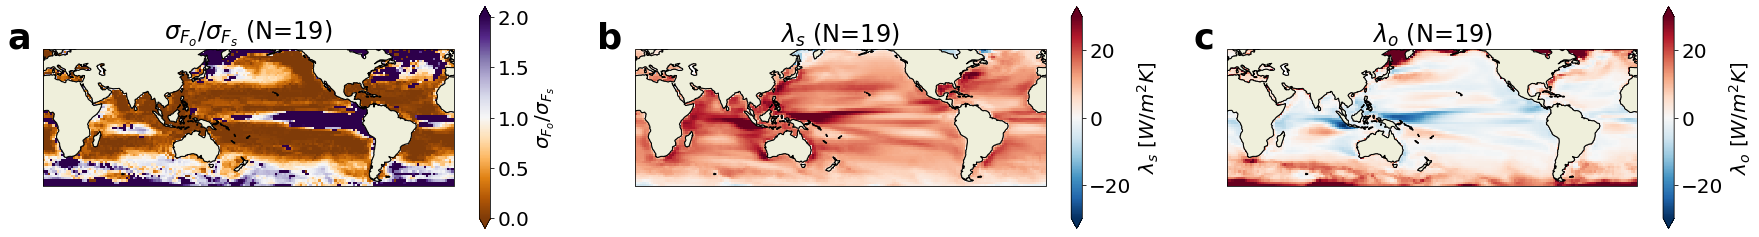

In [4]:
fig = plt.figure(figsize=(25, 5))

font = {'size'   : 20,
        'weight' : 'normal'}

matplotlib.rc('font', **font)

ax1 = fig.add_subplot(131, projection=ccrs.PlateCarree(central_longitude=180))
coeffs.sel(param1='r').sel(param2='coeff').mean('model').plot(ax=ax1, transform=ccrs.PlateCarree(), vmin=0, vmax=2, 
                                                              cmap='PuOr', cbar_kwargs = {"shrink": 0.7,
                                                              "label": r'$\sigma_{F_o}/\sigma_{F_s}$'})
#vert_ds.plot.contour(ax=ax1, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax1.coastlines(color='black', linewidth=1)
ax1.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax1.text(-0.03, 1.2, 'a', transform=ax1.transAxes,
      fontsize=35, fontweight='bold', va='top', ha='right')
ax1.set_title(r'$\sigma_{F_o}/\sigma_{F_s}$ (N=19)')

ax2 = fig.add_subplot(132, projection=ccrs.PlateCarree(central_longitude=180))
coeffs.sel(param1='lambda_a').sel(param2='coeff').mean('model').plot(ax=ax2, transform=ccrs.PlateCarree(), vmin=-30, vmax=30, 
                                                                     cmap='RdBu_r', cbar_kwargs = {"shrink": 0.7,
                                                                     "label": r'$\lambda_s$ [$W/m^2K$]'})
#vert_ds.plot.contour(ax=ax2, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax2.coastlines(color='black', linewidth=1)
ax2.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax2.text(-0.03, 1.2, 'b', transform=ax2.transAxes,
      fontsize=35, fontweight='bold', va='top', ha='right')
ax2.set_title(r'$\lambda_s$ (N=19)')

ax3 = fig.add_subplot(133, projection=ccrs.PlateCarree(central_longitude=180))
coeffs.sel(param1='lambda_o').sel(param2='coeff').mean('model').plot(ax=ax3, transform=ccrs.PlateCarree(), vmin=-30, vmax=30, 
                                                                     cmap='RdBu_r', cbar_kwargs = {"shrink": 0.7,
                                                                     "label": r'$\lambda_o$ [$W/m^2K$]'})
#vert_ds.plot.contour(ax=ax3, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax3.coastlines(color='black', linewidth=1)
ax3.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax3.text(-0.03, 1.2, 'c', transform=ax3.transAxes,
      fontsize=35, fontweight='bold', va='top', ha='right')
ax3.set_title(r'$\lambda_o$ (N=19)')

#plt.suptitle('Lag interval of 3 years', y=0.8)
fig.tight_layout()

Text(0.5, 0.98, 'Parameter Estimate Variance')

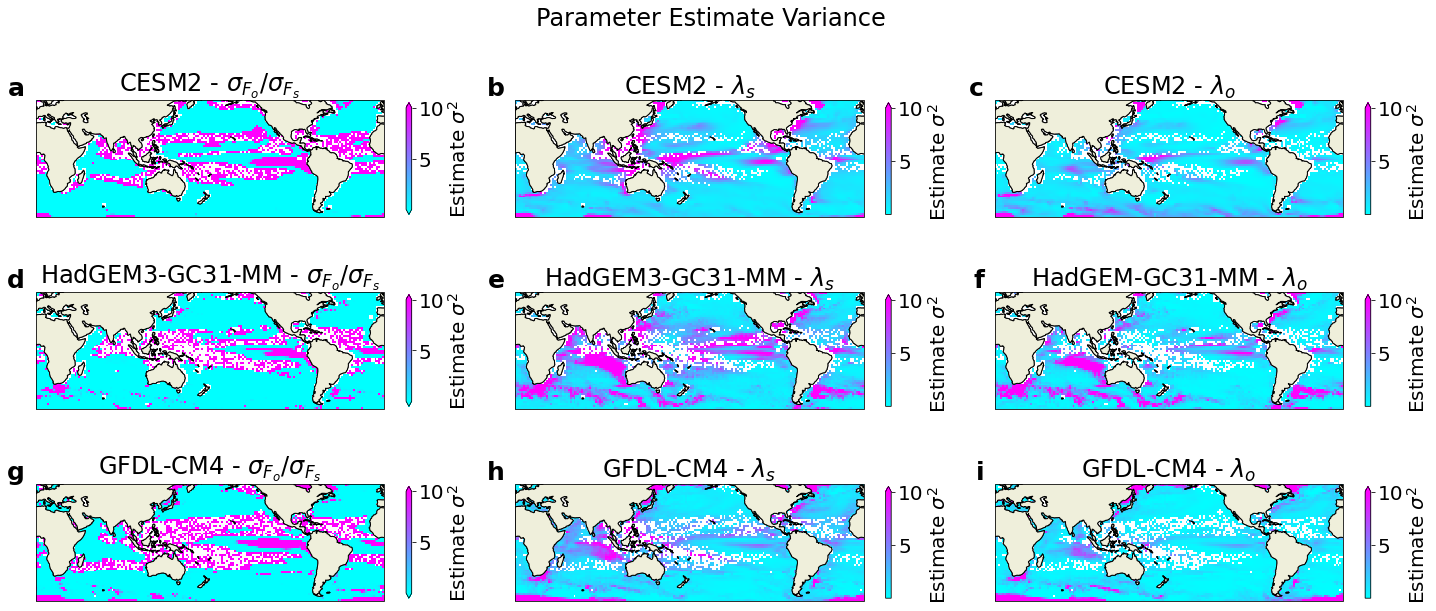

In [5]:
fig = plt.figure(figsize=(25,10))
gs = gridspec.GridSpec(nrows=3, ncols=3)
gs.update(wspace=0.1)

i = 1

font = {'size'   : 20,
        'weight' : 'normal'}
matplotlib.rc('font', **font)

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree(central_longitude=180))
coeffs.sel(model='CESM2').sel(param2='cov1').sel(param1='r').plot(ax=ax1, transform=ccrs.PlateCarree(), vmin=0.01, vmax=10, 
                                                                  cmap='cool',  cbar_kwargs = {"shrink": 0.7,
                                                                  "label": r'Estimate $\sigma^2$'})
ax1.coastlines(color='black', linewidth=1)
ax1.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax1.text(-0.03, 1.2, 'a', transform=ax1.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')
#vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax1.set_title(r'CESM2 - $\sigma_{F_o}/\sigma_{F_s}$')

ax2 = fig.add_subplot(gs[1], projection=ccrs.PlateCarree(central_longitude=180))
coeffs.sel(model='CESM2').sel(param2='cov2').sel(param1='lambda_a').plot(ax=ax2, transform=ccrs.PlateCarree(), vmin=0.01, 
                                                                         vmax=10, cmap='cool', cbar_kwargs = {"shrink": 0.7,
                                                                          "label": r'Estimate $\sigma^2$'})
ax2.coastlines(color='black', linewidth=1)
ax2.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax2.text(-0.03, 1.2, 'b', transform=ax2.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')
#vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax2.set_title(r'CESM2 - $\lambda_s$')

ax3 = fig.add_subplot(gs[2], projection=ccrs.PlateCarree(central_longitude=180))
coeffs.sel(model='CESM2').sel(param2='cov3').sel(param1='lambda_o').plot(ax=ax3, transform=ccrs.PlateCarree(), vmin=0.01,
                                                                         vmax=10, cmap='cool',  cbar_kwargs = {"shrink": 0.7,
                                                                          "label": r'Estimate $\sigma^2$'})
ax3.coastlines(color='black', linewidth=1)
ax3.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax3.text(-0.03, 1.2, 'c', transform=ax3.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')
#vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax3.set_title(r'CESM2 - $\lambda_o$')

ax4 = fig.add_subplot(gs[3], projection=ccrs.PlateCarree(central_longitude=180))
coeffs.sel(model='HadGEM3-GC31-MM').sel(param2='cov1').sel(param1='r').plot(ax=ax4, transform=ccrs.PlateCarree(), vmin=0.01, vmax=10, 
                                                                  cmap='cool',  cbar_kwargs = {"shrink": 0.7,
                                                                  "label": r'Estimate $\sigma^2$'})
ax4.coastlines(color='black', linewidth=1)
ax4.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax4.text(-0.03, 1.2, 'd', transform=ax4.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')
#vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax4.set_title(r'HadGEM3-GC31-MM - $\sigma_{F_o}/\sigma_{F_s}$')

ax5 = fig.add_subplot(gs[4], projection=ccrs.PlateCarree(central_longitude=180))
coeffs.sel(model='HadGEM3-GC31-MM').sel(param2='cov2').sel(param1='lambda_a').plot(ax=ax5, transform=ccrs.PlateCarree(),
                                                                                  vmin=0.01, vmax=10, cmap='cool', 
                                                                                  cbar_kwargs = {"shrink": 0.7,
                                                                                  "label": r'Estimate $\sigma^2$'})
ax5.coastlines(color='black', linewidth=1)
ax5.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax5.text(-0.03, 1.2, 'e', transform=ax5.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')
#vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax5.set_title(r'HadGEM3-GC31-MM - $\lambda_s$')

ax6 = fig.add_subplot(gs[5], projection=ccrs.PlateCarree(central_longitude=180))
coeffs.sel(model='HadGEM3-GC31-MM').sel(param2='cov3').sel(param1='lambda_o').plot(ax=ax6, transform=ccrs.PlateCarree(), vmin=0.01,
                                                                         vmax=10, cmap='cool',  cbar_kwargs = {"shrink": 0.7,
                                                                          "label": r'Estimate $\sigma^2$'})
ax6.coastlines(color='black', linewidth=1)
ax6.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax6.text(-0.03, 1.2, 'f', transform=ax6.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')
#vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax6.set_title(r'HadGEM-GC31-MM - $\lambda_o$')

ax7 = fig.add_subplot(gs[6], projection=ccrs.PlateCarree(central_longitude=180))
coeffs.sel(model='GFDL-CM4').sel(param2='cov1').sel(param1='r').plot(ax=ax7, transform=ccrs.PlateCarree(), vmin=0.01, vmax=10, 
                                                                  cmap='cool',  cbar_kwargs = {"shrink": 0.7,
                                                                  "label": r'Estimate $\sigma^2$'})
ax7.coastlines(color='black', linewidth=1)
ax7.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax7.text(-0.03, 1.2, 'g', transform=ax7.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')
#vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax7.set_title(r'GFDL-CM4 - $\sigma_{F_o}/\sigma_{F_s}$')

ax8 = fig.add_subplot(gs[7], projection=ccrs.PlateCarree(central_longitude=180))
coeffs.sel(model='GFDL-CM4').sel(param2='cov2').sel(param1='lambda_a').plot(ax=ax8, transform=ccrs.PlateCarree(), vmin=0.01, 
                                                                         vmax=10, cmap='cool', cbar_kwargs = {"shrink": 0.7,
                                                                          "label": r'Estimate $\sigma^2$'})
ax8.coastlines(color='black', linewidth=1)
ax8.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax8.text(-0.03, 1.2, 'h', transform=ax8.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')
#vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax8.set_title(r'GFDL-CM4 - $\lambda_s$')

ax9 = fig.add_subplot(gs[8], projection=ccrs.PlateCarree(central_longitude=180))
coeffs.sel(model='GFDL-CM4').sel(param2='cov3').sel(param1='lambda_o').plot(ax=ax9, transform=ccrs.PlateCarree(), vmin=0.01,
                                                                         vmax=10, cmap='cool',  cbar_kwargs = {"shrink": 0.7,
                                                                          "label": r'Estimate $\sigma^2$'})
ax9.coastlines(color='black', linewidth=1)
ax9.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax9.text(-0.03, 1.2, 'i', transform=ax9.transAxes,
      fontsize=25, fontweight='bold', va='top', ha='right')
#vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax9.set_title(r'GFDL-CM4 - $\lambda_o$')

plt.suptitle('Parameter Estimate Variance')

In [8]:
wp_test = coeffs.sel(lon=146, method='nearest').sel(lat=5, method='nearest').sel(model='HadGEM3-GC31-MM')
print(wp_test)

<xarray.DataArray (param1: 3, param2: 4)>
array([[2.17583102e-06,            inf,            inf,            inf],
       [8.77905181e+00,            inf,            inf,            inf],
       [4.06143733e-01,            inf,            inf,            inf]])
Coordinates:
    lon      int64 147
    lat      int64 5
    model    <U15 'HadGEM3-GC31-MM'
  * param2   (param2) object 'coeff' 'cov1' 'cov2' 'cov3'
  * param1   (param1) object 'r' 'lambda_a' 'lambda_o'


In [23]:
wp_test[1,0].values

array(8.77905181)

Text(0.5, 1.0, 'lambda_a variance - HadGEM-GC31-MM')

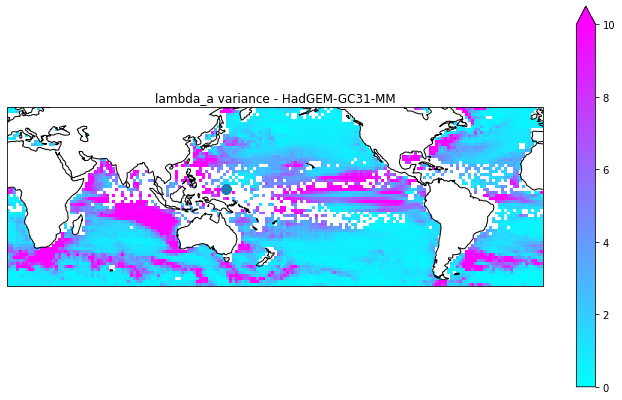

In [10]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
coeffs.sel(param2='cov2').sel(param1='lambda_a').sel(model='HadGEM3-GC31-MM').plot(ax=ax, transform=ccrs.PlateCarree(), 
                                                                 vmin=0, vmax=10, cmap='cool')
ax.coastlines(color='black', linewidth=1)
plt.plot(146, 5, marker='o', markersize=10, transform=ccrs.PlateCarree())
#vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('lambda_a variance - HadGEM-GC31-MM')

In [9]:
mlotst = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_mlotst_piControl_last250_2x2_29mod.nc')
mlotst.load()

<xarray.DataArray 'mlotst' (name: 29, time: 3000, lat: 88, lon: 179)>
array([[[[         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         ...,
         [ 37.84589291,  35.24663067,  32.06676531, ...,  33.25462341,
           40.17043972,  42.24071884],
         [ 29.28758764,  27.5836072 ,  24.68433762, ...,  31.06294441,
           26.27577305,  27.77302122],
         [ 51.7123785 ,  51.78336048,  51.44082642, ...,  33.68997192,
           36.9603219 ,  42.8179884 ]],

        [[         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
         [         nan,          nan,          nan, ...,          nan,
                   nan,          nan],
...
         [ 22.67234421,  21.14872932,  20.97480583, ...,  27.90272331,
           26.6061058 ,  25.40342331],
         [ 28.94810867,  27.83931541,  26.80410194, ...,  34.63275909,
           33.4764595 ,  31.97872734],
         [ 35.02958298,  34.27975845,  33.57102585, ...,  38.12451553,
           37.42809677,  36.65962601]],

        [[  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         ...,
         [ 26.26085663,  24.96127129,  25.07527924, ...,  33.66339874,
           31.28085899,  29.52363396],
         [ 33.03013992,  32.67450333,  32.45067978, ...,  36.9946785 ,
           36.23771667,  35.3212471 ],
         [ 41.97396088,  41.10193253,  40.17913818, ...,  44.73409271,
           44.29957581,  43.7323494 ]]]])
Coordinates:
    latitude   (lat, lon) float64 nan nan nan nan nan ... 86.99 86.92 86.8 86.61
    longitude  (lat, lon) float64 nan nan nan nan ... -5.602 2.988 11.02 18.28
  * time       (time) datetime64[ns] 1851-01-31 1851-02-28 ... 2100-12-31
  * lat        (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon        (lon) int64 1 3 5 7 9 11 13 15 ... 345 347 349 351 353 355 357
  * name       (name) object 'GFDL-CM4' 'GFDL-ESM4' ... 'EC-Earth3-CC'
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Ocean Mixed Layer Thickness Defined by Sigma T
    original_name:  mlotst
    standard_name:  ocean_mixed_layer_thickness_defined_by_sigma_t
    units:          m

In [5]:
# Analytical solution

def analytical(params, lagint):
    lambda_o = params['lambda_o'] # Ocean feedback
    lambda_a = params['lambda_a'] # Atmospheric feedback
    sigma_a = params['sigma_a']   # Variance of atmospheric forcing
    sigma_o = params['sigma_o']   # Variance of oceanic forcing
    
    dt = 60*60*24*30 # Timestep - month [s]
        
    lag_series = np.arange(-lagint,lagint,1)*dt
        
    c = c_p*density*mlotst_equator # Heat capacity
    
    w_0 = (lambda_a + lambda_o)/c

    eq_secondhalf = (lambda_a + lambda_o) * 2/(sigma_a**2+sigma_o**2) * np.exp(-w_0*abs(lag_series))
    
    for i in range(len(eq_secondhalf)):
        if lag_series[i]>0:
            eq_secondhalf[i] = 0
        else:
            eq_secondhalf[i] = eq_secondhalf[i]
        
    # r_analytical = -np.exp(-lambda_a*abs(lag_series*dt)/c)*lambda_a
    r_atmos = -lambda_a*np.exp(-w_0*abs(lag_series)) + (eq_secondhalf)*sigma_a**2
    r_ocean = -lambda_o*np.exp(-w_0*abs(lag_series)) + (eq_secondhalf)*sigma_o**2

    return r_atmos, r_ocean

In [6]:
def lagregress(Q, SST, lagint):
    
    lag_series = np.arange(-lagint, lagint, 1)
    lagresponse_q = np.zeros(len(lag_series))
    
    i = 0
    for lag in lag_series:
        if lag < 0:
            lagged_Q = Q.shift(time=-lag).isel(time=slice(-lag,3000))
            lagged_sst = SST.isel(time=slice(-lag,3000))
        elif lag == 0:
            lagged_Q = Q
            lagged_sst = SST.isel(time=slice(0,3000))
        elif lag > 0:
            lagged_Q = Q.shift(time=-lag).isel(time=slice(0,3000-lag))
            lagged_sst = SST.isel(time=slice(0,3000-lag))
        # Remove seasonality
        climatology_sst = lagged_sst.groupby('time.month').mean('time')
        sst_anomalies = lagged_sst.groupby('time.month') - climatology_sst
        climatology_rad = lagged_Q.groupby('time.month').mean('time')
        rad_anomalies = lagged_Q.groupby('time.month') - climatology_rad
        lagresponse_q[i] = np.polyfit(sst_anomalies, rad_anomalies, deg=1)[0]
        i += 1
        
    return lagresponse_q, lag_series

In [10]:
params = {}
params['lambda_a'] = wp_test[1,0].values
params['lambda_o'] = wp_test[2,0].values
params['sigma_a'] = 1
params['sigma_o'] = wp_test[0,0].values
years = 250
lagint = 12*3

density = 1026 #Water density - kg/m3
c_p = 3850 #Specific heat of salt water - J/kgC
seconds = 30*24*60*60 #Time in a week - seconds
mlotst_equator = mlotst.sel(lat=5,method='nearest').sel(lon=146,method='nearest'
                                                        ).sel(name='HadGEM3-GC31-MM').mean('time').values

wp_atm, wp_oce = analytical(params, lagint)

In [11]:
qs_cont = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_surface_21mod_piControl_2x2_last250.nc')
qs_cont.load()

qo_cont = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_ocean_21mod_piControl_2x2_last250_1.nc')
qo_cont.load()

sst_cont = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_ts_39model_piControl_2x2_last250.nc')
sst_cont.load()

<xarray.DataArray 'ts' (name: 39, time: 3000, lat: 88, lon: 179)>
array([[[[242.84971771, 242.66496582, 242.47948456, ..., 243.58927612,
          243.40431213, 243.21939468],
         [243.63949127, 243.44372253, 243.29657745, ..., 244.90614929,
          244.59173203, 244.2774704 ],
         [246.25374451, 245.90968399, 245.56938934, ..., 247.87031631,
          247.43874741, 247.00861588],
         ...,
         [240.82526779, 241.02651901, 241.20874405, ..., 239.58558884,
          239.71549988, 239.87349091],
         [239.01806641, 239.15462875, 239.1531105 , ..., 238.66062698,
          238.73306274, 238.8034462 ],
         [237.19956894, 237.17460861, 237.14242172, ..., 237.29992981,
          237.27476883, 237.249646  ]],

        [[231.19080734, 230.98271408, 230.78353119, ..., 232.02898483,
          231.81859207, 231.60873795],
         [232.5759758 , 232.11302643, 231.76231384, ..., 234.26324005,
          233.81225967, 233.36273651],
         [235.06249237, 234.55499725, 234.08073044, ..., 237.85826569,
          237.20528412, 236.5481102 ],
...
         [252.59700031, 252.89710688, 253.18277567, ..., 250.96788747,
          251.57834489, 251.93443832],
         [251.47553492, 251.63000926, 251.78449822, ..., 250.86185002,
          251.05764086, 251.19390183],
         [250.43064473, 250.46915922, 250.50767451, ..., 250.24815816,
          250.29478923, 250.34143216]],

        [[235.88255857, 235.75679429, 235.63103429, ..., 236.59539711,
          236.40969452, 236.22399193],
         [235.93133072, 235.68662307, 235.44192515, ..., 237.32241488,
          236.9268464 , 236.57758065],
         [238.58421597, 238.05978223, 237.53220096, ..., 240.46987246,
          240.08363551, 239.59210982],
         ...,
         [253.46696183, 253.88567042, 254.27706997, ..., 250.97582524,
          251.83714181, 252.4119334 ],
         [251.4940111 , 251.81559306, 252.13716932, ..., 250.50176832,
          250.80569175, 251.01669927],
         [250.60141325, 250.71503962, 250.82868043, ..., 250.18500417,
          250.28774586, 250.39048754]]]])
Coordinates:
  * time     (time) datetime64[ns] 1851-01-31 1851-02-28 ... 2100-12-31
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'GFDL-CM4' 'GFDL-ESM4' ... 'EC-Earth3-CC'
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Surface Temperature
    original_name:  ts
    standard_name:  surface_temperature
    units:          K

In [12]:
lat = 5
lon = 146
wp_a = lagregress(qs_cont.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').sel(name='HadGEM3-GC31-MM'), 
                         sst_cont.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').sel(name='HadGEM3-GC31-MM'),
                         lagint = 12*3)

wp_o = lagregress(qo_cont.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').sel(name='HadGEM3-GC31-MM'), 
                         sst_cont.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').sel(name='HadGEM3-GC31-MM'),
                         lagint = 12*3)

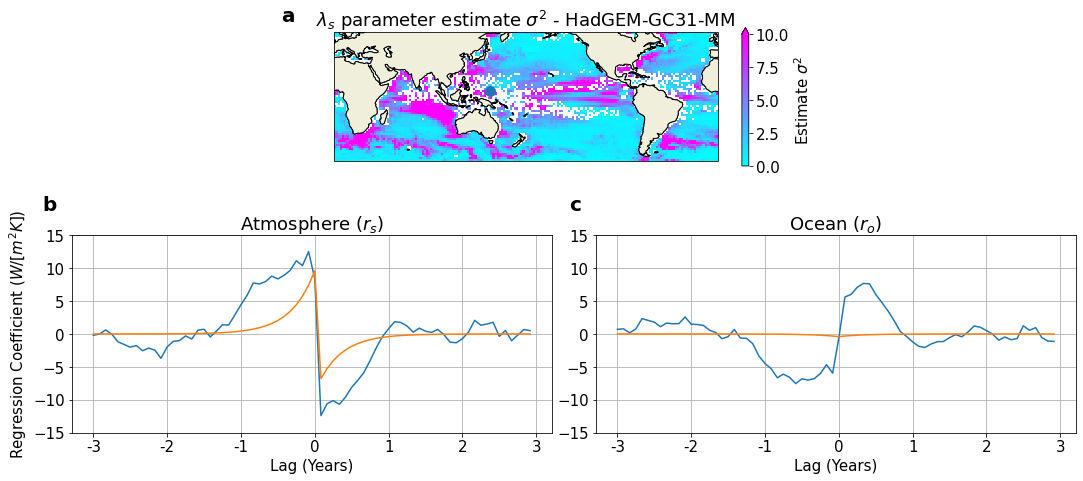

In [14]:
# Using automatic curve fit
fig = plt.figure(figsize=(18,8))
gs = gridspec.GridSpec(nrows=2, ncols=4)

font = {'size'   : 15,
        'weight' : 'normal'}

matplotlib.rc('font', **font)

ax1 = fig.add_subplot(gs[0,1:3], projection=ccrs.PlateCarree(central_longitude=180))
coeffs.sel(param2='cov2').sel(param1='lambda_a').sel(model='HadGEM3-GC31-MM').plot(ax=ax1, transform=ccrs.PlateCarree(), 
                                                                                   vmin=0, vmax=10, cmap='cool', 
                                                                                   cbar_kwargs = {"shrink": 0.7,
                                                                                   "label": r'Estimate $\sigma^2$'})
ax1.coastlines(color='black', linewidth=1)
ax1.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax1.plot(146, 5, marker='o', markersize=10, transform=ccrs.PlateCarree())
ax1.text(-0.1, 1.2, 'a', transform=ax1.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')
#vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax1.set_title(r'$\lambda_s$ parameter estimate $\sigma^2$ - HadGEM-GC31-MM')

# Atmosphere
ax2 = fig.add_subplot(gs[1,0:2])
ax2.plot(wp_a[1], wp_a[0])
ax2.plot(wp_a[1], wp_atm)
ax2.set_xticks(np.arange(-12*3,12*4,12), np.arange(-3,4,1))
ax2.set_ylim(-15,15)
ax2.set_xlabel('Lag (Years)')
ax2.set_title(r'Atmosphere ($r_s$)')
ax2.set_ylabel(r'Regression Coefficient ($W/[m^2K]$)')
ax2.text(-0.03, 1.2, 'b', transform=ax2.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')
#ax.set_title('Regression slopes vs. Lag')
ax2.grid()

# Ocean
ax3 = fig.add_subplot(gs[1,2:4])
ax3.plot(wp_o[1], wp_o[0])
ax3.plot(wp_o[1], wp_oce)
ax3.set_xticks(np.arange(-12*3,12*4,12), np.arange(-3,4,1))
ax3.set_ylim(-15,15)
ax3.set_xlabel('Lag (Years)')
ax3.text(-0.03, 1.2, 'c', transform=ax3.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')
#ax3.set_ylabel(r'Regression slopes ($W/[m^2K mon]$)')
ax3.set_title(r'Ocean ($r_o$)')
#ax2.set_title('Regression slopes vs. Lag')
ax3.grid()

#plt.suptitle('(146,5) - (N=15)')

<xarray.DataArray (param1: 3, param2: 4)>
array([[ 1.93680125e-05,  6.90890199e+05, -6.53710605e+02,
         3.96412406e+02],
       [ 7.37597988e+00, -6.53710605e+02,  1.00813702e+01,
        -3.15546496e+00],
       [-6.13859689e-01,  3.96412406e+02, -3.15546496e+00,
         1.79668040e+00]])
Coordinates:
    lon      int64 95
    lat      int64 1
    model    <U15 'HadGEM3-GC31-MM'
  * param2   (param2) object 'coeff' 'cov1' 'cov2' 'cov3'
  * param1   (param1) object 'r' 'lambda_a' 'lambda_o'


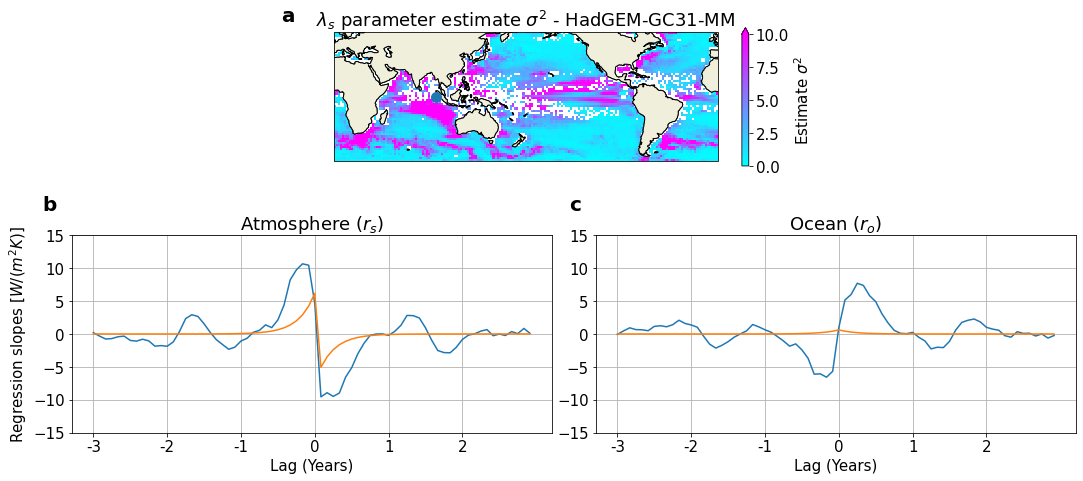

In [37]:
lat = 0
lon = 95

wp_test = coeffs.sel(lon=lon, method='nearest').sel(lat=lat, method='nearest').sel(model='HadGEM3-GC31-MM')
print(wp_test)

params = {}
params['lambda_a'] = wp_test[1,0].values
params['lambda_o'] = wp_test[2,0].values
params['sigma_a'] = 1
params['sigma_o'] = wp_test[0,0].values
years = 250
lagint = 12*3


density = 1026 #Water density - kg/m3
c_p = 3850 #Specific heat of salt water - J/kgC
seconds = 30*24*60*60 #Time in a week - seconds
mlotst_equator = mlotst.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest'
                                                        ).sel(name='HadGEM3-GC31-MM').mean('time').values

wp_atm, wp_oce = analytical(params, lagint)

wp_a = lagregress(qs_cont.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').sel(name='HadGEM3-GC31-MM'), 
                         sst_cont.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').sel(name='HadGEM3-GC31-MM'),
                         lagint = 12*3)

wp_o = lagregress(qo_cont.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').sel(name='HadGEM3-GC31-MM'), 
                         sst_cont.sel(lat=lat,method='nearest').sel(lon=lon,method='nearest').sel(name='HadGEM3-GC31-MM'),
                         lagint = 12*3)

# Using automatic curve fit
fig = plt.figure(figsize=(18,8))
gs = gridspec.GridSpec(nrows=2, ncols=4)

font = {'size'   : 15,
        'weight' : 'normal'}

matplotlib.rc('font', **font)

ax1 = fig.add_subplot(gs[0,1:3], projection=ccrs.PlateCarree(central_longitude=180))
coeffs.sel(param2='cov2').sel(param1='lambda_a').sel(model='HadGEM3-GC31-MM').plot(ax=ax1, transform=ccrs.PlateCarree(), 
                                                                                   vmin=0, vmax=10, cmap='cool', 
                                                                                   cbar_kwargs = {"shrink": 0.7,
                                                                                   "label": r'Estimate $\sigma^2$'})
ax1.coastlines(color='black', linewidth=1)
ax1.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax1.plot(lon, lat, marker='o', markersize=10, transform=ccrs.PlateCarree())
ax1.text(-0.1, 1.2, 'a', transform=ax1.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')
#vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax1.set_title(r'$\lambda_s$ parameter estimate $\sigma^2$ - HadGEM-GC31-MM')

# Atmosphere
ax2 = fig.add_subplot(gs[1,0:2])
ax2.plot(wp_a[1], wp_a[0])
ax2.plot(wp_a[1], wp_atm)
ax2.set_xticks(np.arange(-12*3,12*3,12), np.arange(-3,3,1))
ax2.set_ylim(-15,15)
ax2.set_xlabel('Lag (Years)')
ax2.set_title(r'Atmosphere ($r_s$)')
ax2.set_ylabel(r'Regression slopes [$W/(m^2K)$]')
ax2.text(-0.03, 1.2, 'b', transform=ax2.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')
#ax.set_title('Regression slopes vs. Lag')
ax2.grid()

# Ocean
ax3 = fig.add_subplot(gs[1,2:4])
ax3.plot(wp_o[1], wp_o[0])
ax3.plot(wp_o[1], wp_oce)
ax3.set_xticks(np.arange(-12*3,12*3,12), np.arange(-3,3,1))
ax3.set_ylim(-15,15)
ax3.set_xlabel('Lag (Years)')
ax3.text(-0.03, 1.2, 'c', transform=ax3.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')
#ax3.set_ylabel(r'Regression slopes ($W/[m^2K mon]$)')
ax3.set_title(r'Ocean ($r_o$)')
#ax2.set_title('Regression slopes vs. Lag')
ax3.grid()

#plt.suptitle('(146,5) - (N=15)')